<a href="https://colab.research.google.com/github/vipul43/image_description/blob/main/MutliLabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import scipy.io
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import pandas as pd
from PIL import Image 
import matplotlib.pylab as plt
import pickle
from skimage import transform
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# data loading

!gdown --id 1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm
!gdown --id 1V6pINkZy2AwIVBmCV4d96wMKhkiWDx2A

mat01 = scipy.io.loadmat('/content/abstract50S.mat')
print(type(mat01))

mat02 = scipy.io.loadmat('/content/pascal50S.mat')
print(type(mat02))

Downloading...
From: https://drive.google.com/uc?id=1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm
To: /content/pascal50S.mat
100% 1.12M/1.12M [00:00<00:00, 74.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V6pINkZy2AwIVBmCV4d96wMKhkiWDx2A
To: /content/abstract50S.mat
100% 562k/562k [00:00<00:00, 69.8MB/s]
<class 'dict'>
<class 'dict'>


In [3]:
classes = ['person', 
           'bird', 
           'cat', 
           'cow', 
           'dog', 
           'horse', 
           'sheep', 
           'aeroplane', 
           'bicycle', 
           'boat', 
           'bus', 
           'car', 
           'motorbike', 
           'train', 
           'bottle', 
           'chair', 
           'dining table', 
           'potted plant', 
           'sofa', 
           'tv/monitor']

In [4]:
# observing data
data = []
for i in mat02["train_sent_final"][0]:
  # image = io.imread(i[0][0])
  # cv2_imshow(image)
  point= []
  link = [i[0][0]]
  cls = set()
  for k in i[1]:
    for sent in k:
      for word in sent[0].split():
        if(word in classes):
          cls.add(word)
  data.append([link, list(cls)])
print(data)

[[['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_006488.jpg'], ['person', 'boat']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_008632.jpg'], ['car', 'train']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_003378.jpg'], ['train', 'car', 'bus']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_008048.jpg'], []], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_002567.jpg'], []], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_004441.jpg'], ['bicycle', 'car']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_002467.jpg'], ['bottle']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_002395.jpg'], ['dog']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_006397.jpg'], ['horse', 'person']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_004621.jpg'], ['sheep']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_002222.jpg'], ['train', 'bus']], [['https://filebox.ece.vt.edu/~vrama91/PASCAL/2008_007519.jpg'], ['dog']], [['https://filebox.ece.vt.edu/~vrama

In [5]:
# j = 0

# for i in mat["abs_sent"][0]:
#   # image = io.imread(i[0][0])
#   # cv2_imshow(image)
#   for k in i[1]:
#     for sent in k:
#       print(sent[0])
#       for word in sent[0].split():
#         if(word in classes):
#           print(word)
        
#   if j > 1:
#     break
#   j = j + 1

In [6]:
file = open("data.pkl", "wb")
pickle.dump(data, file)
file.close()

In [7]:
# preprocessing the dataset
'''
data -> url -> image -> array -> resized array
TrainX = array of images resized to (224x224x3)
TrainY = array of labels with size (20x1) in ones-zeros vector like [1, 1, 0, ....]
'''
# TrainX
new_shape = (224, 224, 3)
TrainX = []
for point in data:
  photo = io.imread(point[0][0])
  photo = transform.resize(image=photo, output_shape=new_shape)
  TrainX.append(photo)
print(len(TrainX), len(TrainX[0]), len(TrainX[0][0]))

# TrainY
TrainY = []
for points in data:
  full_label = np.zeros(shape=(20, ))
  for labels in points[1]:
    i = classes.index(labels)
    full_label[i] = 1
  TrainY.append(full_label)
print(len(TrainY), len(TrainY[0]))
TrainX = np.array(TrainX)
TrainY = np.array(TrainY)

1000 224 224
1000 20


In [8]:
# data splitting
'''
train size: 700 images
val size: 300 images
output: TrainX, TrainY, valX, valY
'''
TrainX, ValX, TrainY, ValY = train_test_split(TrainX, TrainY, test_size=0.3, random_state=1)
print(TrainX.shape)

(700, 224, 224, 3)


In [22]:
print(ValX[0].shape)

(224, 224, 3)


In [9]:
# instantiate data augmentation
'''
use this 'tf.keras.preprocessing.ImageDataGenerator'
'''
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True)
datagen.fit(TrainX)

In [10]:
# model making
'''
design keras model with VGG16(https://keras.io/api/applications/)
conv blocks(conv layer, batch normalization layer, max pooling layer, batch normalization)
flatten or global average pooling
dense() 
dense()
dense(20, activation='sigmoid')
'''
model = tf.keras.Sequential()

#Transfer Learning with VGG16 model with weights as imagenet
model.add(tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_tensor=tf.keras.Input(shape=(224, 224, 3)), classes=20))

#Convolution Block-1
model.add(tf.keras.layers.Conv2D(64, (2,2), strides=(1, 1), padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

#Convolution Block-2
model.add(tf.keras.layers.Conv2D(32, (2,2), strides=(1, 1), padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

#Convolution Block-3
model.add(tf.keras.layers.Conv2D(16, (2,2), strides=(1, 1), padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

#Flatten layer
model.add(tf.keras.layers.Flatten())

#Dense layers
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))

#Output layer
model.add(tf.keras.layers.Dense(20, activation="sigmoid"))

model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 64)          131136    
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          8224      
_________________________________________________________

In [11]:
# config cell
LR = 0.003
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = len(TrainX) // BATCH_SIZE
DECAY = LR // EPOCHS
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)
METRICS = ['acc']

In [12]:
# model compiling
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)

In [13]:
# training
history = model.fit(datagen.flow(TrainX, TrainY, batch_size=BATCH_SIZE), validation_data=(ValX, ValY), steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS)

Epoch 1/10
21/21 [==============================] - 78s 2s/step - loss: 0.5301 - acc: 0.2324 - val_loss: 15.1359 - val_acc: 0.3900
Epoch 2/10
21/21 [==============================] - 18s 846ms/step - loss: 0.2106 - acc: 0.3262 - val_loss: 3.0713 - val_acc: 0.3900
Epoch 3/10
21/21 [==============================] - 18s 854ms/step - loss: 0.1912 - acc: 0.4182 - val_loss: 0.7978 - val_acc: 0.3333
Epoch 4/10
21/21 [==============================] - 18s 855ms/step - loss: 0.1917 - acc: 0.4170 - val_loss: 0.5175 - val_acc: 0.3767
Epoch 5/10
21/21 [==============================] - 18s 855ms/step - loss: 0.1861 - acc: 0.4088 - val_loss: 0.5297 - val_acc: 0.0367
Epoch 6/10
21/21 [==============================] - 18s 854ms/step - loss: 0.1883 - acc: 0.3054 - val_loss: 0.5072 - val_acc: 0.0667
Epoch 7/10
21/21 [==============================] - 18s 857ms/step - loss: 0.1860 - acc: 0.3491 - val_loss: 0.3089 - val_acc: 0.1500
Epoch 8/10
21/21 [==============================] - 18s 856ms/step - lo

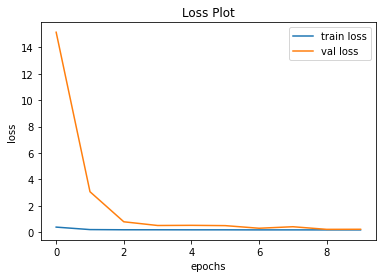

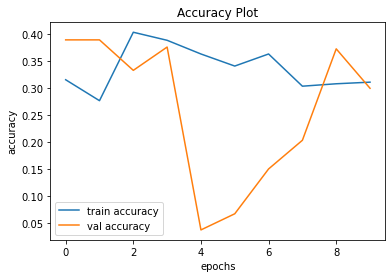

In [14]:
# plotting curves
'''
loss -> train, val
accuracy -> train, val
'''
plt.plot(list(history.history.values())[0])
plt.plot(list(history.history.values())[2])
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

plt.plot(list(history.history.values())[1])
plt.plot(list(history.history.values())[3])
plt.title('Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [36]:
# random predictions on val dataset
def show_image_from_url(L):
  image = io.imread(L)
  cv2_imshow(image)

rnd = np.random.randint(0, len(ValX))
link = ValX[rnd]
input_arr = np.array([link])
label = ValY[rnd]
pred = model.predict(input_arr)
pred = (pred > 0.5)
pred = pred.astype(int)
print("True Label:", label)
print("Predicted Label:", pred)

True Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Label: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
